# K-NN classifier with MNIST dataset

In [139]:
import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

## 1. Setup the environment for K-NN

### Import MNIST dataset

In [110]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

### Prepare the Training and Test dataset

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=10000)
labels = np.unique(y_train)
print("The shape of X_train : ",X_train.shape)
print("The shape of X_test : ",X_test.shape)
print("The shape of Y_train : ",y_train.shape)
print("The shape of Y_test : ",y_test.shape)
print("Labels in y : ",labels)

The shape of X_train :  (60000, 784)
The shape of X_test :  (10000, 784)
The shape of Y_train :  (60000,)
The shape of Y_test :  (10000,)
Labels in y :  ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


### Display training examples

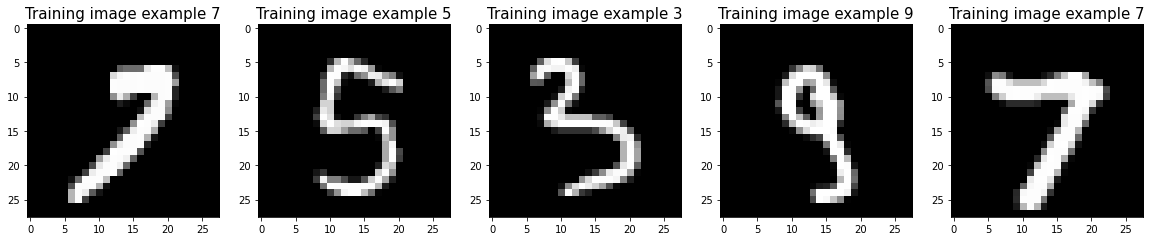

In [112]:
plt.figure(figsize=(20,4))

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(np.reshape(X_train[i,:],(28,28)),cmap='gray')
    plt.title('Training image example %i' %int(y_train[i]), fontsize=15)

### Conventional KNN algorithm over whole data with K=1


In [113]:
t0 = time.time()
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
run_time = time.time() - t0
print("Algorithm runs in %.3f s" % run_time)

Algorithm runs in 19.119 s


In [114]:
print("Accuracy of convential 1-NN calssifier: ",metrics.accuracy_score(y_predict,y_test))

Accuracy of convential 1-NN calssifier:  0.9736


## 2. Choosing 'prototypes' method
-In this part, we will compare the uniformly random choice on training data and choice on prototype. We will be using K-means clustering to find the centroid of each label in terms of choosing prototype. From there, we can choose more eligeble data point to train data.

### 2.1 The function randomly (uniformly) choose 'M' samples from the training set.

In [130]:
def rand_prototype(X_train,y_train,M):
    indices = np.random.choice(len(y_train), M, replace=False)
    return X_train[indices,:], y_train[indices]
# sampleX, sampleY = rand_prototype(1000)

#### Random choice with different M values (1000, 5000, 10000, 20000, 40000)

In [124]:
# M = [1000,5000,10000,20000,40000]
# M = 1000
accuracy = []
X_train_1000, y_train_1000 = rand_prototype(X_train,y_train,1000)
knn.fit(X_train_1000,y_train_1000)
y_predict = knn.predict(X_test)
print("Accuracy of convential 1-NN calssifier with 1000 samples: ",metrics.accuracy_score(y_predict,y_test))
accuracy.append(metrics.accuracy_score(y_predict,y_test))


Accuracy of convential 1-NN calssifier with 1000 samples:  0.8792


### 2.2 Implementation my own algorithm:
-In this step, we want to build a more efficient algorithm than conventional KNN. Instead of choosing 'M' training sampels randomly, my approach here is to first build a ball tree to segmentize data in high dimension to search nearest neighbors faster. Then we can find the center of each labels(classes) to collect the 'M' training data closest to the center. Since computing all euclidian distances for sampels cost can be expensive, it seems reasonable to use tree algorithm to find 'M' nearest neighbors.

#Then we'll be utilizing k-means algorithm to find the centroids of each group.

Clustering:
Partitional clustering : no object can be a member of more than one cluster => k-means


In [115]:
from sklearn.cluster import KMeans
from sklearn.neighbors import BallTree

In [116]:
def get_indices_closest_points(M, tree, target_data):
    dist, idx = np.squeeze(tree.query(target_data[:],k=M))
    return idx.astype(int)

In [206]:
def my_algorithm1(X_train, y_train, M):

    # Retrieve data by label
    X_train_0 = X_train[y_train == '0']
    X_train_1 = X_train[y_train == '1']
    X_train_2 = X_train[y_train == '2']
    X_train_3 = X_train[y_train == '3']
    X_train_4 = X_train[y_train == '4']
    X_train_5 = X_train[y_train == '5']
    X_train_6 = X_train[y_train == '6']
    X_train_7 = X_train[y_train == '7']
    X_train_8 = X_train[y_train == '8']
    X_train_9 = X_train[y_train == '9']
    X_train_labels = [X_train_0,X_train_1,X_train_2,X_train_3,X_train_4,
                      X_train_5,X_train_6,X_train_7,X_train_8,X_train_9]
    
    ball_tree = BallTree(X_train, metric ='euclidean')
    
    # run K-means
    num_centroids = 10

    kmeans_0 = KMeans(n_clusters=num_centroids, init='k-means++',random_state=0).fit(X_train_0)
    sample_0 = kmeans_0.cluster_centers_

    kmeans_1 = KMeans(n_clusters=num_centroids, init='k-means++',random_state=0).fit(X_train_1)
    sample_1 = kmeans_1.cluster_centers_

    kmeans_2 = KMeans(n_clusters=num_centroids, init='k-means++',random_state=0).fit(X_train_2)
    sample_2 = kmeans_2.cluster_centers_

    kmeans_3 = KMeans(n_clusters=num_centroids, init='k-means++',random_state=0).fit(X_train_3)
    sample_3 = kmeans_3.cluster_centers_

    kmeans_4 = KMeans(n_clusters=num_centroids, init='k-means++',random_state=0).fit(X_train_4)
    sample_4 = kmeans_4.cluster_centers_

    kmeans_5 = KMeans(n_clusters=num_centroids, init='k-means++',random_state=0).fit(X_train_5)
    sample_5 = kmeans_5.cluster_centers_

    kmeans_6 = KMeans(n_clusters=num_centroids, init='k-means++',random_state=0).fit(X_train_6)
    sample_6 = kmeans_6.cluster_centers_

    kmeans_7 = KMeans(n_clusters=num_centroids, init='k-means++',random_state=0).fit(X_train_7)
    sample_7 = kmeans_7.cluster_centers_

    kmeans_8 = KMeans(n_clusters=num_centroids, init='k-means++',random_state=0).fit(X_train_8)
    sample_8 = kmeans_8.cluster_centers_

    kmeans_9 = KMeans(n_clusters=num_centroids, init='k-means++',random_state=0).fit(X_train_9)
    sample_9 = kmeans_9.cluster_centers_
    
    #choose M closest data points (M/10 for each labels)
    
#     M = 100
    proto_sample = np.empty([0,0])
    #create empty array to store nearest neighbors
    all_0 = np.empty([0,784])
    all_1 = np.empty([0,784])
    all_2 = np.empty([0,784])
    all_3 = np.empty([0,784])
    all_4 = np.empty([0,784])
    all_5 = np.empty([0,784])
    all_6 = np.empty([0,784])
    all_7 = np.empty([0,784])
    all_8 = np.empty([0,784])
    all_9 = np.empty([0,784])
    M = M//num_centroids
    for i in range(num_centroids):
#         print("Iteration: ", i)
        #iterate over cenroids we've found above
        cluster_0 = sample_0[i,:][np.newaxis,:]
        cluster_1 = sample_1[i,:][np.newaxis,:]
        cluster_2 = sample_2[i,:][np.newaxis,:]
        cluster_3 = sample_3[i,:][np.newaxis,:]
        cluster_4 = sample_4[i,:][np.newaxis,:]
        cluster_5 = sample_5[i,:][np.newaxis,:]
        cluster_6 = sample_6[i,:][np.newaxis,:]
        cluster_7 = sample_7[i,:][np.newaxis,:]
        cluster_8 = sample_8[i,:][np.newaxis,:]
        cluster_9 = sample_9[i,:][np.newaxis,:]

#         print("Done with clusters")
        
        #get M/#centroids points (i.e, if M=1000, #centroids=10 => 100 nearest points for each label)
        idx0 = get_indices_closest_points(M//num_centroids, ball_tree, cluster_0)
        idx1 = get_indices_closest_points(M//num_centroids, ball_tree, cluster_1)
        idx2 = get_indices_closest_points(M//num_centroids, ball_tree, cluster_2)
        idx3 = get_indices_closest_points(M//num_centroids, ball_tree, cluster_3)
        idx4 = get_indices_closest_points(M//num_centroids, ball_tree, cluster_4)
        idx5 = get_indices_closest_points(M//num_centroids, ball_tree, cluster_5)
        idx6 = get_indices_closest_points(M//num_centroids, ball_tree, cluster_6)
        idx7 = get_indices_closest_points(M//num_centroids, ball_tree, cluster_7)
        idx8 = get_indices_closest_points(M//num_centroids, ball_tree, cluster_8)
        idx9 = get_indices_closest_points(M//num_centroids, ball_tree, cluster_9)

#         print("Done with idx")
        csample_0 = X_train[idx0,:]
        csample_1 = X_train[idx1,:]
        csample_2 = X_train[idx2,:]
        csample_3 = X_train[idx3,:]
        csample_4 = X_train[idx4,:]
        csample_5 = X_train[idx5,:]
        csample_6 = X_train[idx6,:]
        csample_7 = X_train[idx7,:]
        csample_8 = X_train[idx8,:]
        csample_9 = X_train[idx9,:]

#         print("Done with csample")
        all_0 = np.concatenate((all_0, csample_0))
        all_1 = np.concatenate((all_1, csample_1))
        all_2 = np.concatenate((all_2, csample_2))
        all_3 = np.concatenate((all_3, csample_3))
        all_4 = np.concatenate((all_4, csample_4))
        all_5 = np.concatenate((all_5, csample_5))
        all_6 = np.concatenate((all_6, csample_6))
        all_7 = np.concatenate((all_7, csample_7))
        all_8 = np.concatenate((all_8, csample_8))
        all_9 = np.concatenate((all_9, csample_9))

#         print("Done stacking")
######################End for loop#######################
# stack prototypes and create labels
    proto_sample = np.concatenate((all_0,all_1,
                                   all_2,all_3,
                                   all_4,all_5,
                                   all_6,all_7,
                                   all_8,all_9
                                  ), axis = 0)

    sample_0_labels = np.full((M,), 0)
    sample_1_labels = np.full((M,), 1)
    sample_2_labels = np.full((M,), 2)
    sample_3_labels = np.full((M,), 3)
    sample_4_labels = np.full((M,), 4)
    sample_5_labels = np.full((M,), 5)
    sample_6_labels = np.full((M,), 6)
    sample_7_labels = np.full((M,), 7)
    sample_8_labels = np.full((M,), 8)
    sample_9_labels = np.full((M,), 9)

    # same for labels
    proto_labels = np.concatenate((sample_0_labels,sample_1_labels,
                                   sample_2_labels,sample_3_labels,
                                   sample_4_labels,sample_5_labels,
                                   sample_6_labels,sample_7_labels,
                                   sample_8_labels,sample_9_labels),
                                  axis = 0
                                 )

    
    
    return proto_sample, proto_labels

In [164]:
# #test script
# subX, subY = my_algorithm1(X_train, y_train, 1000)
# print(subX.shape)
# print(subY.shape)

# t0 = time.time()
# knn_base = KNeighborsClassifier(n_neighbors=1)
# knn_base.fit(subX, subY)
# y_predict = knn_base.predict(X_test)
# run_time = time.time() - t0
# print("Algorithm runs in %.3f s" % run_time)

# y_test = [int(n) for n in y_test]
# print("Accuracy of convential 1-NN calssifier: ",metrics.accuracy_score(y_predict,y_test))

## 3. Compare the performances of 2 methods 
### Conventional NN VS Prototyped NN

- We've found the accuracy of conventional 1-NN classifier above

In [204]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=10000)
labels = np.unique(y_train)
print("The shape of X_train : ",X_train.shape)
print("The shape of X_test : ",X_test.shape)
print("The shape of Y_train : ",y_train.shape)
print("The shape of Y_test : ",y_test.shape)
print("Labels in y : ",labels)

The shape of X_train :  (60000, 784)
The shape of X_test :  (10000, 784)
The shape of Y_train :  (60000,)
The shape of Y_test :  (10000,)
Labels in y :  ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


### 3.1 Fit 1-NN classifier with randomly chosen subset

In [175]:
M = [1000, 2000, 3000, 5000, 7000, 10000]
knn = KNeighborsClassifier(n_neighbors=1)

#random choose phase
accuracy = []
for subsize in M:
    subX1, subY1 = rand_prototype(X_train,y_train,subsize)
    knn.fit(subX1,subY1)
    y_predict1 = knn.predict(X_test)
#     y_test = [int(n) for n in y_test]
    temp_accuracy = metrics.accuracy_score(y_predict1,y_test)
    accuracy.append(temp_accuracy)
accuracy

[0.8783, 0.9068, 0.9194, 0.9331, 0.9422, 0.9468]

### 3.2 Fit 1-NN classifier with prototyped subset

In [207]:
# prototyping phase
my_accuracy = []
for subsize in M:
    subX, subY = my_algorithm1(X_train, y_train, subsize)
    knn.fit(subX,subY)
    y_predict2 = knn.predict(X_test)
    y_test = [int(n) for n in y_test]
    temp_accuracy = metrics.accuracy_score(y_predict2,y_test)
    my_accuracy.append(temp_accuracy)    

In [208]:
print(accuracy)
print(my_accuracy)

[0.8783, 0.9068, 0.9194, 0.9331, 0.9422, 0.9468]
[0.9064, 0.9162, 0.9189, 0.9255, 0.9276, 0.9271]


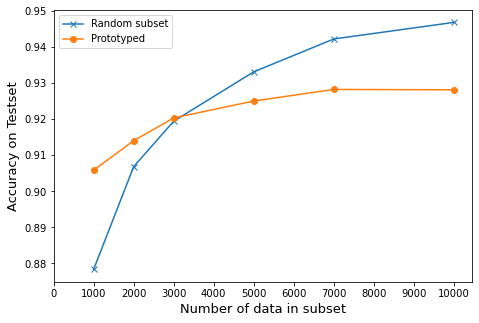

In [198]:
plt.rcParams["figure.figsize"] = [7.50, 5]

plt.plot(M,accuracy, marker='x')
plt.plot(M,my_accuracy, marker='o')

plt.legend(['Random subset','Prototyped'])
plt.xlabel('Number of data in subset', fontsize='13')
plt.ylabel('Accuracy on Testset', fontsize='13')

plt.xticks(np.arange(0,11000,1000))
plt.show()

### 3.3 Compute the confidence interval of random subset algorithm
- We'll be using t-distribution since the sample size is 10(<30).

In [216]:
import scipy.stats as st
from scipy.stats import t

In [211]:
#M = [1000, 2000, 3000, 5000, 7000, 10000]

acc = np.array([[0.8867, 0.9125, 0.9282, 0.9357, 0.9456, 0.9484],
                [0.8793, 0.9011, 0.9203, 0.9309, 0.9388, 0.9487],
                [0.8821, 0.917, 0.9186, 0.9337, 0.9402, 0.9491],
                [0.8862, 0.9089, 0.9215, 0.9358, 0.9447, 0.9476],
                [0.8818, 0.9131, 0.9177, 0.932, 0.9394, 0.9471],
                [0.8713, 0.9118, 0.9212, 0.9329, 0.9429, 0.9503],
                [0.8837, 0.9101, 0.92, 0.9356, 0.9396, 0.9502],
                [0.8778, 0.905, 0.9153, 0.9359, 0.9404, 0.9476],
                [0.8814, 0.9083, 0.9194, 0.9342, 0.9366, 0.9479],
                [0.8783, 0.9068, 0.9194, 0.9331, 0.9422, 0.9468]])

sample_mean = acc.mean(axis=0)
sample_std = np.std(acc,axis=0)

acc1000 = acc[:,0]
acc2000 = acc[:,1]
acc3000 = acc[:,2]
acc5000 = acc[:,3]
acc7000 = acc[:,4]
acc10000 = acc[:,5]


In [215]:
sample_mean

array([0.88086, 0.90946, 0.92016, 0.93398, 0.94104, 0.94837])

In [218]:
print(st.t.interval(alpha=0.95,df=len(acc1000)-1, loc=sample_mean[0],scale=st.sem(acc1000)))
print(st.t.interval(alpha=0.95,df=len(acc2000)-1, loc=sample_mean[1],scale=st.sem(acc2000)))
print(st.t.interval(alpha=0.95,df=len(acc3000)-1, loc=sample_mean[2],scale=st.sem(acc3000)))
print(st.t.interval(alpha=0.95,df=len(acc5000)-1, loc=sample_mean[3],scale=st.sem(acc5000)))
print(st.t.interval(alpha=0.95,df=len(acc7000)-1, loc=sample_mean[4],scale=st.sem(acc7000)))
print(st.t.interval(alpha=0.95,df=len(acc10000)-1, loc=sample_mean[5],scale=st.sem(acc10000)))


(0.8776330081613224, 0.8840869918386776)
(0.9062277264925314, 0.912692273507469)
(0.9177656729002867, 0.9225543270997131)
(0.9327169678780721, 0.9352430321219279)
(0.9390506160098208, 0.9430293839901794)
(0.9475036269488581, 0.949236373051142)
